# HOTEL BOOKING CANCELLATION PREDICTION

### GOAL OF THE PROJECT

In this project, we aim to build a predictive model to determine whether a hotel booking would be canceled or not, 
which is crucial for hotels as cancellations affect revenue and operational planning. The dataset contains a 
high number of features related to booking, such as lead time, deposit type, and different countries, which adds to the 
complexity of the model. The challenge lies in the data preprocessing steps, which include feature selection and engineering,
handling missing values, and noise in the data. Additionally, we are going to train different models, evaluate their 
performance using the right metrics, and interpret the model by analyzing the most important features in the context of
hotel booking cancellations.
This is classification problem.

 ### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True) #visualize in offline mode or in notebook
import plotly.express as px
import sort_dataframeby_monthorweek as sd

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

### IMPORT DATASET

In [2]:
df=pd.read_csv(r"D:\IMARTICUS\ml project\hotel_booking_mlpro\hotel_bookings.csv")

In [3]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [4]:
df.shape

(119390, 32)

In [5]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

### DATA CLEANING

In [6]:
df.isnull().sum()[df.isnull().sum()>0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [7]:
df.drop(['agent','company'],axis=1,inplace=True) 

# agent feture is id of travel agency that have made booking
# company is id on entity who did booking

In [8]:
df.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [9]:
df.country.fillna('PRT', inplace=True)
df.fillna(0,inplace=True)

In [10]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [11]:
### seems to have some dirtiness in data as Adults,babies & children cant be zero at a same time .

### bcz if 3 entities are 0 ,then how can a booking be possible ??

In [12]:
### Visualise Entire Dataframe where adult,children & babies are 0

filter1=(df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [13]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [14]:
#data=df[filter1== False]
data=df[~filter1] # ~ is nagation 
#it return all rows upper condition is not true 

In [15]:
data.shape

(119210, 30)

In [16]:
df.shape

(119390, 30)

In [17]:
data.arrival_date_year.unique()

array([2015, 2016, 2017], dtype=int64)

### EXPLORATORY DATA ANALYSIS

#### 1. Where do the guests come from ?

In [18]:
## Lets perform Spatial Analysis

In [19]:
data['is_canceled'].unique() 
# 0-- Booking Doesnt Cancelled
# 1--Customer is cancelled booking

array([0, 1], dtype=int64)

In [20]:
data[data['is_canceled']==0]['country'].value_counts()/75011
# there is apperend diff booking location

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [21]:
len(data[data['is_canceled']==0])

75011

In [22]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','no_of_guests']
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [23]:
#!pip install plotly

In [24]:
#!pip install chart_studio

In [25]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True) #visualize in offline mode or in notebook
import plotly.express as px

In [26]:
map_guest=px.choropleth(country_wise_data,
             locations=country_wise_data['country'],
             color=country_wise_data['no_of_guests'],
              hover_name=country_wise_data['country'],
              title='Home country of guests'
)

In [27]:
map_guest.show()

#### 2. How much do guests pay for a room per night ?

In [28]:
data2=data[data['is_canceled']==0]

In [29]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price( EUR)')

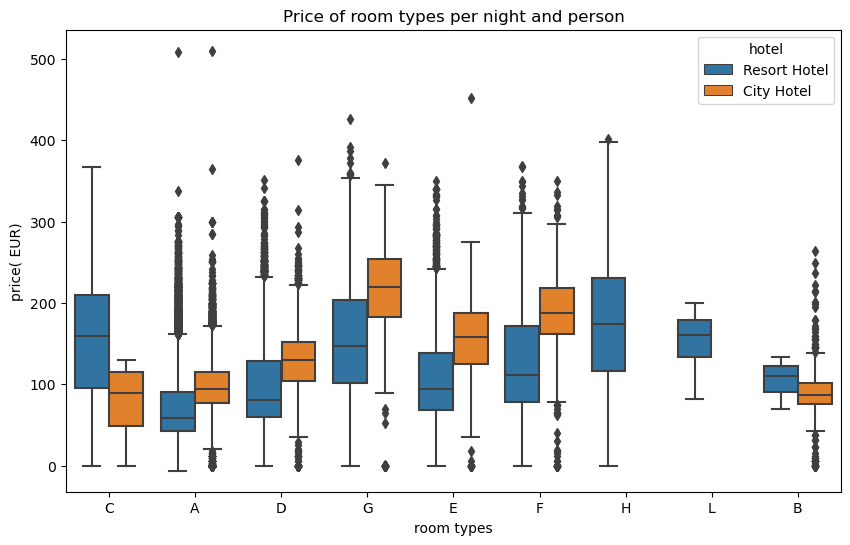

In [30]:
# seaborn boxplot:

plt.figure(figsize=(10,6))
sns.boxplot(x='reserved_room_type',y='adr' ,hue='hotel',data=data2)

plt.title('Price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price( EUR)')

In case of City Hotel 'G' room type category performing well because median value is extremly high 
wheras in case of Resort Hotel 'H' room category is performing well .

#### 3. Which are the most busy month ?

In [31]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [32]:
data_resort=data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
data_city = data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [33]:
data_resort.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [34]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [35]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no_of_guests']
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [36]:
final_rush=rush_resort.merge(rush_city,on='month')

In [37]:
final_rush.columns=['month','no_of_guests_in_resort','no_of_guests_city']

In [38]:
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [39]:
# !pip install sorted-months-weekdays

# ## Dependency package to be installed
# !pip install sort_dataframeby_monthorweek

In [40]:
import sort_dataframeby_monthorweek as sd

In [41]:
final_rush=sd.Sort_Dataframeby_Month(final_rush,'month')

In [42]:
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [43]:

fig = px.line(data_frame=final_rush, x='month', y=['no_of_guests_in_resort', 'no_of_guests_city'])


fig.update_layout(
    title='Number of Guests in Resort vs. City by Month',
    xaxis_title='Month',
    yaxis_title='Number of Guests'
)

fig.show()


#### 4. which month has highest adr ?

In [44]:
data=sd.Sort_Dataframeby_Month(data,'arrival_date_month')

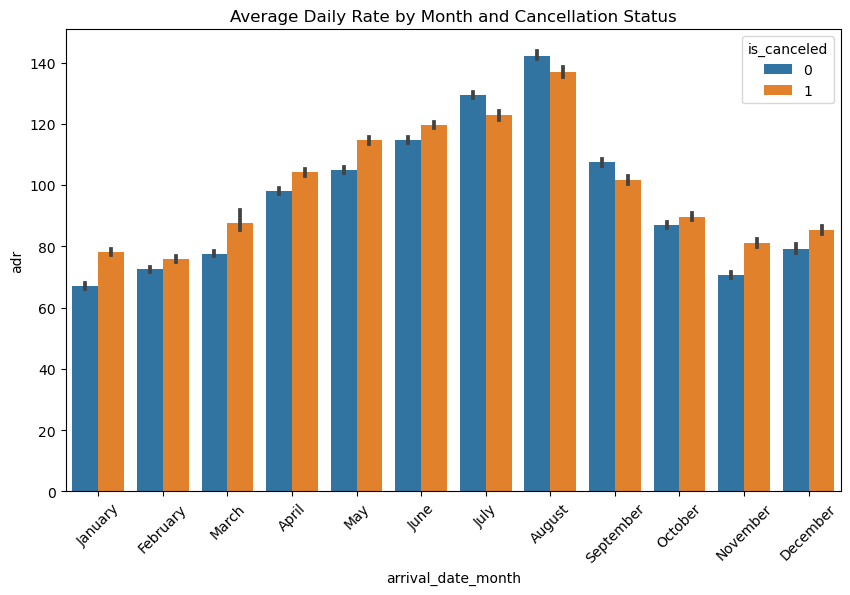

In [45]:
#barplot
plt.figure(figsize=(10, 6)) 
sns.barplot(x='arrival_date_month', y='adr', data=data, hue='is_canceled')

plt.xticks(rotation=45)
plt.title('Average Daily Rate by Month and Cancellation Status')

plt.show()

#### 5. Lets analyse whether bookings were made only for weekdays or for weekends or for both ?

In [46]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [47]:
### Lets create a relationship table..
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
## lets define our own function :

def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1] >0 :
        return 'stay_just_weekend'
    
    elif row[feature2]>0 and row[feature1] ==0 :
        return 'stay_just_weekdays'
    
    elif row[feature2]>0 and row[feature1] >0 :
        return 'stay_both_weekdays_weekends'
    
    else:
        return 'undefined_data'

In [49]:
data2['weekend_or_weekday']=data2.apply(week_function,axis=1)

In [50]:
data2.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,stay_just_weekdays


In [51]:
data2['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekends    37551
stay_just_weekdays             31788
stay_just_weekend               5050
undefined_data                   622
Name: weekend_or_weekday, dtype: int64

In [52]:
data2=sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [53]:
data2.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    3627
                    stay_just_weekdays             2559
                    stay_just_weekend               344
                    undefined_data                   30
August              stay_both_weekdays_weekends    4929
                    stay_just_weekdays             3137
                    stay_just_weekend               509
                    undefined_data                   49
December            stay_both_weekdays_weekends    1901
                    stay_just_weekdays             2123
                    stay_just_weekend               298
                    undefined_data                   69
February            stay_both_weekdays_weekends    2438
                    stay_just_weekdays             2514
                    stay_just_weekend               360
                    undefined_data                   47
January             stay_both_weekdays_weekends    1550


In [54]:
group_data=data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()
group_data

weekend_or_weekday,arrival_date_month,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
0,April,3627,2559,344,30
1,August,4929,3137,509,49
2,December,1901,2123,298,69
3,February,2438,2514,360,47
4,January,1550,2125,393,47
5,July,4570,2818,462,57
6,June,3241,2685,433,36
7,March,3151,3060,359,50
8,May,3442,3017,570,74
9,November,2117,2214,261,59


In [55]:
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')
sorted_data

,arrival_date_month,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
0,January,1550,2125,393,47
1,February,2438,2514,360,47
2,March,3151,3060,359,50
3,April,3627,2559,344,30
4,May,3442,3017,570,74
5,June,3241,2685,433,36
6,July,4570,2818,462,57
7,August,4929,3137,509,49
8,September,3192,2692,479,22
9,October,3393,2844,582,82


In [56]:
sorted_data.set_index('arrival_date_month',inplace=True)

In [57]:
sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


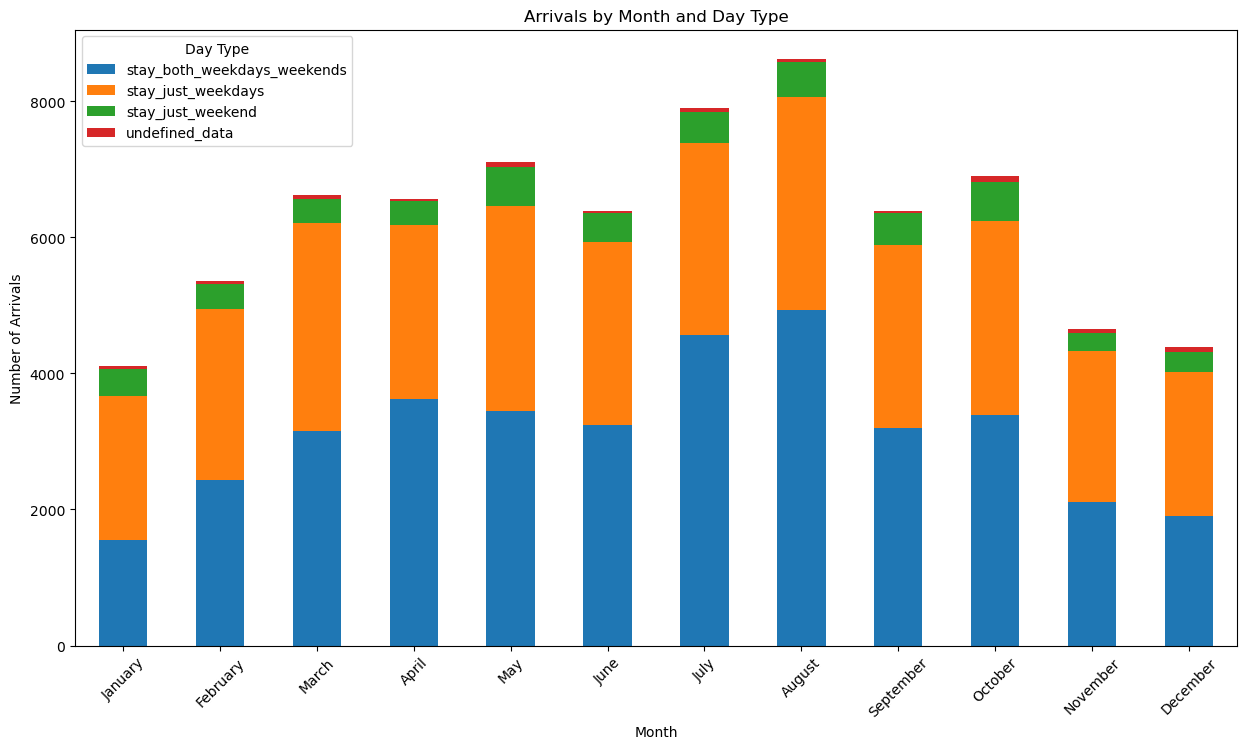

In [58]:
ax = sorted_data.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.title('Arrivals by Month and Day Type')

plt.xlabel('Month')
plt.ylabel('Number of Arrivals')

plt.xticks(rotation=45)

plt.legend(title='Day Type', loc='upper left')
plt.show()

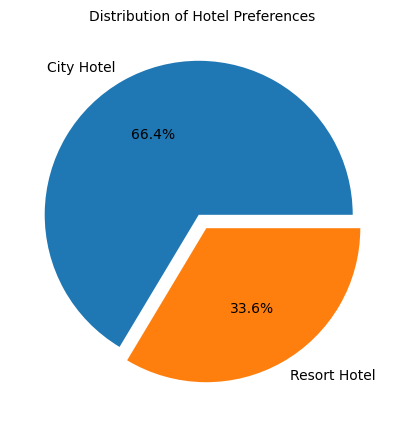

In [59]:

data['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], figsize=(8, 5), fontsize=10, autopct='%1.1f%%')


plt.title('Distribution of Hotel Preferences', fontsize=10)
plt.ylabel('')  

plt.show()


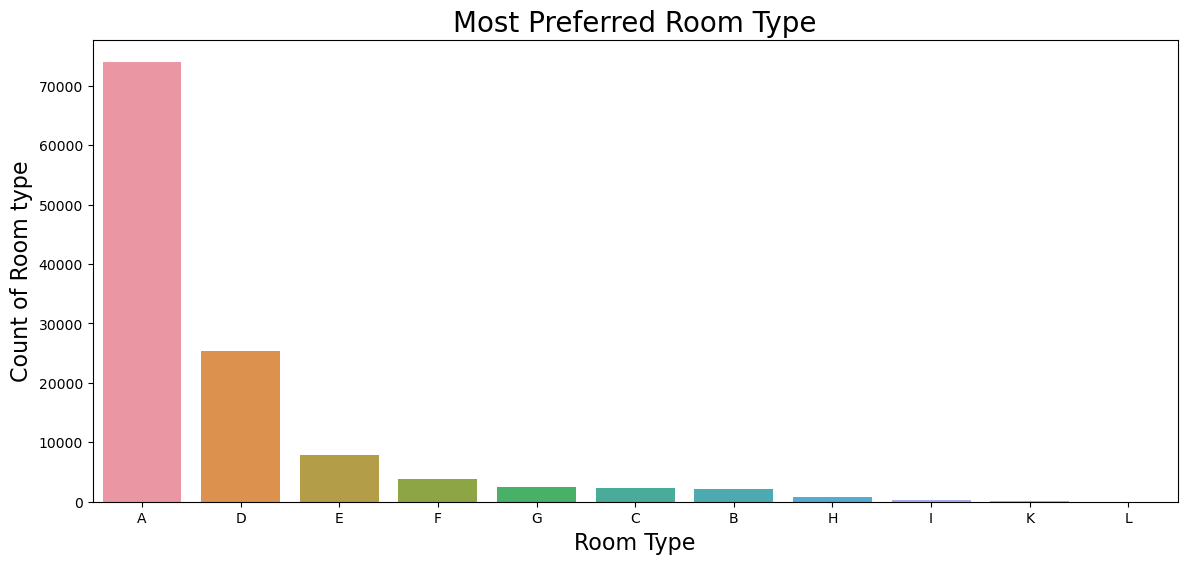

In [60]:
#countplot
plt.figure(figsize=(14, 6))

sns.countplot(x=data['assigned_room_type'], order=data['assigned_room_type'].value_counts().index)

plt.xlabel('Room Type', fontsize=16)
plt.ylabel('Count of Room type', fontsize=16)
plt.title('Most Preferred Room Type', fontsize=20)

plt.show()


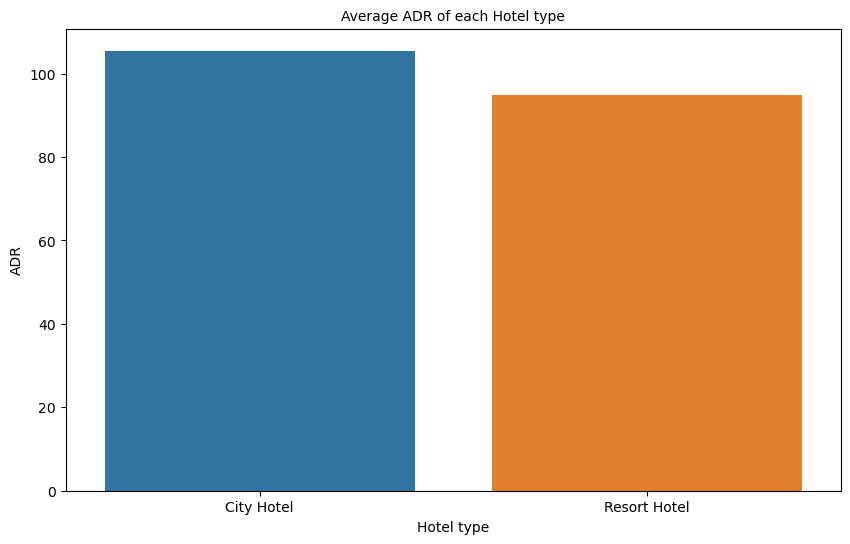

In [61]:
# AVERAGE DAILY RATE OF HOTELS

group_by_hotel = data.groupby('hotel')

highest_adr = group_by_hotel['adr'].mean().reset_index()

plt.figure(figsize = (10,6))

ax = sns.barplot(x= highest_adr['hotel'], y= highest_adr['adr'])

ax.set_xlabel("Hotel type", fontsize = 10)
ax.set_ylabel("ADR", fontsize = 10)
ax.set_xticklabels(['City Hotel', 'Resort Hotel'], fontsize = 10)
ax.set_title('Average ADR of each Hotel type', fontsize = 10)

plt.show(ax)

### Create some more features.

In [62]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [63]:
def family(row):
    if (row['adults'] > 0) & (row['children'] >0 or row['babies']>0):
        return 1 
    else :
        return 0
    

In [64]:
data['is_family']= data.apply(family,axis=1)

In [65]:
data['total_customer']= data['adults'] + data['babies'] + data['children']

In [66]:
data['total_nights']= data['stays_in_week_nights'] + data['stays_in_weekend_nights']

In [67]:
data['deposit_type'].unique()


array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [68]:
dict1 = {'No Deposit':0, 'Non Refund':1, 'Refundable':0}

In [69]:
data['deposite_given']=data['deposit_type'].map(dict1)

In [70]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposite_given'],
      dtype='object')

In [71]:
data.drop(columns=['adults', 'children', 'babies', 'deposit_type' ], axis=1, inplace=True)

In [72]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposite_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,BB,...,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0


### FEATURE ENCODING

In [73]:
data.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposite_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,BB,...,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,HB,...,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,BB,...,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2,0
5,Resort Hotel,1,76,2016,January,1,1,1,2,BB,...,Transient,57.90,0,1,Canceled,12/20/2015,0,2.0,3,0


In [74]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [75]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposite_given'],
      dtype='object')

In [76]:
cate_features=[col for col in data.columns if data[col].dtype=='object']

In [77]:
num_features=[col for col in data.columns if data[col].dtype!='object']

In [78]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposite_given']

In [79]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [80]:
data_cat=data[cate_features]

In [81]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [82]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [83]:
data_cat['cancellation']=data['is_canceled']

In [84]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,1


In [85]:
cols=data_cat.columns

In [86]:
cols=cols[0:-1]

In [87]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [88]:
### Perform Mean Encoding Technique 

for col in cols:
    dict2=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict2)

In [89]:
data_cat.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,0.101010,1


### HANDLING OUTLIERS 

In [90]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposite_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,1,3.0,11,0
119206,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
119207,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0
119208,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0


In [91]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [92]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposite_given'],
      dtype='object')

In [93]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

In [94]:
dataframe.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposite_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,...,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,...,0,0,0,89.00,0,1,0,2.0,1,0


<Axes: xlabel='lead_time', ylabel='Density'>

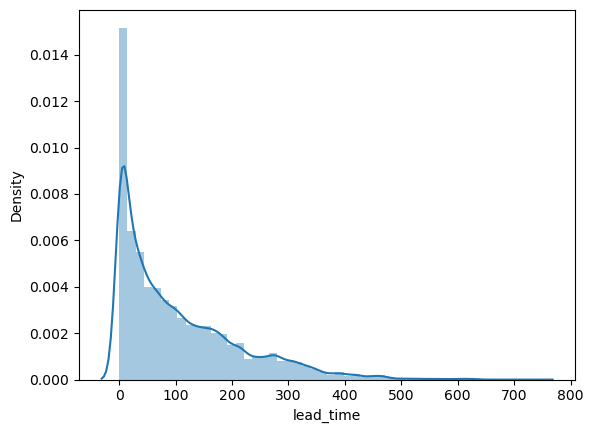

In [95]:
sns.distplot(dataframe['lead_time'])

In [96]:
def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col])

In [97]:
handle_outlier('lead_time')

<Axes: xlabel='lead_time', ylabel='Density'>

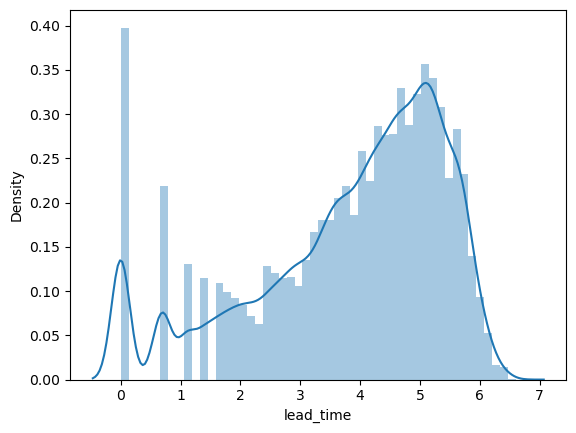

In [98]:
sns.distplot(dataframe['lead_time'])

In [99]:
## adr

<Axes: xlabel='adr', ylabel='Density'>

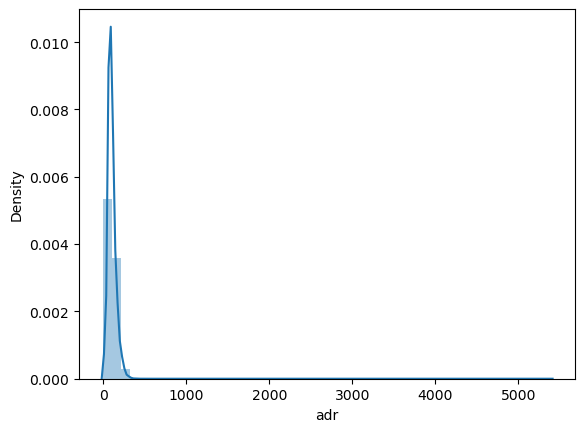

In [100]:
sns.distplot(dataframe['adr'])

In [101]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposite_given
14989,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,...,2,2,0,-6.38,0,0,0,2.0,10,0


In [102]:
handle_outlier('adr')

In [103]:
dataframe['adr'].isnull().sum()

1

In [104]:
### now why this missing value , as we have already deal with the missing values..'
### bcz we have negative value in 'adr' feature as '-6.38'  ,& if we apply ln(1+x) , we will get 'nan'
## bcz log wont take negative values..

<Axes: xlabel='adr', ylabel='Density'>

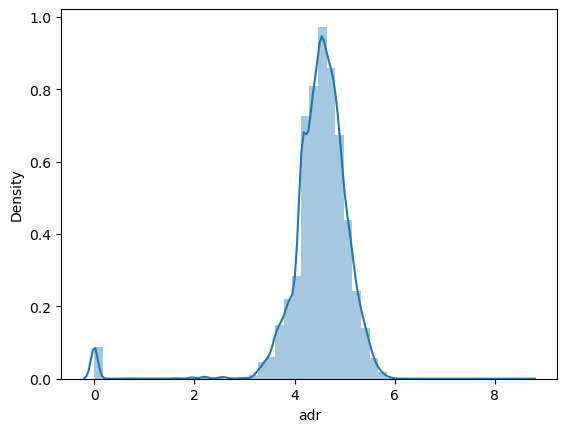

In [105]:
sns.distplot(dataframe['adr'].dropna())

### UNIVARIATE ANALYSIS

In [106]:
###UNIVARIATE ANALYSIS --One Varible is useful for ml model

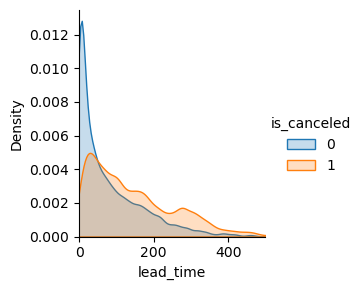

In [107]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend()
#kde--Kernel Density Estimation

In [108]:
# upto some extend this feature plays important role bcoz it dosnt has complete overlapping.

### IMPORTANT FEATURE USING CO-RELATION

In [109]:
corr=dataframe.corr()

In [110]:
corr
# 2 feature  
# High corr--1,.95,.9 --> better to drop cause situtation of overfitting
# low corr--- 0.01, 0.02--> interpretating low accuracy for model

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposite_given
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,...,-0.004467,-0.076598,0.072725,0.154041,-0.218961,-0.043478,-0.058094,-0.038762,-0.249747,0.172415
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,...,-0.021971,-0.011049,0.029164,0.228179,-0.021910,0.002763,0.020491,0.079090,0.045648,0.057361
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,...,0.011109,-0.027189,-0.031562,-0.019908,0.003455,0.006875,0.001466,-0.003447,-0.055689,0.047597
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,-0.029320,0.357232,...,0.091795,-0.061513,0.067054,-0.160520,0.007613,-0.200822,-0.044139,-0.117351,-0.160759,0.395685
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,...,-0.117519,-0.057578,0.096385,-0.004009,-0.145726,-0.155463,-0.104584,-0.023874,-0.004546,0.397229
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,...,-0.142650,-0.118461,0.048001,0.126516,-0.146562,0.075047,-0.026278,0.087776,0.084999,0.115160
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,...,0.022533,-0.040134,0.068336,-0.185932,-0.093401,-0.161406,-0.133748,-0.246347,-0.188866,0.201923
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,...,-0.003205,-0.096277,0.067129,-0.038347,-0.131035,-0.135337,-0.179356,-0.229081,-0.103571,0.263383
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,...,0.024716,-0.095486,-0.101833,0.117592,0.061786,0.137114,0.106618,0.124318,0.037720,0.121789
reservation_status,0.137082,0.069886,0.050584,0.357232,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,...,-0.057365,-0.144832,0.054301,0.081660,-0.195701,-0.234877,-0.013226,0.044826,0.018554,0.481507


In [111]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposite_given                    0.481507
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
arrival_dat

In [112]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposite_given', 'country', 'lead_time', 'market_segment',
       'assigned_room_type', 'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customer',
       'stays_in_week_nights', 'total_nights', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [113]:
features_to_drop=['reservation_status', 'reservation_status_date','arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month']

In [114]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [115]:
dataframe.shape

(119210, 24)

### FEATURE IMPORTANCE

In [116]:
dataframe.head(2)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,is_canceled,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposite_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0,...,0,0,0,4.109890,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0,...,0,0,0,4.763028,1,1,1,4.0,1,0


In [117]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    0
total_nights                      0
deposite_given                    0
dtype: int64

In [118]:
dataframe.dropna(inplace=True)

In [119]:
## separate dependent & independent features

In [120]:
x=dataframe.drop('is_canceled',axis=1)

In [121]:
y=dataframe['is_canceled']

In [122]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [123]:
##Lasso(alpha=0.005)
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.


In [124]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [125]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [126]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [127]:
cols=x.columns

In [128]:
cols.shape

(23,)

In [129]:
# let's print the number of selected features

selected_feature=cols[feature_sel_model.get_support()]

In [130]:
selected_feature

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposite_given'],
      dtype='object')

In [131]:
selected_feature.shape

(12,)

In [132]:
x=x[selected_feature]

In [133]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119209, dtype: int64

### MODEL BUILDING

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.25)

In [136]:
X_train.shape

(89406, 12)

In [137]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [138]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [139]:
pred=logreg.predict(X_test)

In [140]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [141]:
from sklearn.metrics import confusion_matrix

In [142]:
confusion_matrix(y_test,pred)

array([[17313,  1405],
       [ 4614,  6471]], dtype=int64)

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.798040465724927

In [144]:
pred_prob_test = logreg.predict_proba(X_test)

In [145]:
from sklearn.metrics import roc_auc_score, roc_curve

In [146]:
roc_auc_score(y_test ,pred_prob_test[:, 1])

0.8612905703978664

In [147]:
fpr , tpr, threshold = roc_curve(y_test ,pred_prob_test[:, 1])

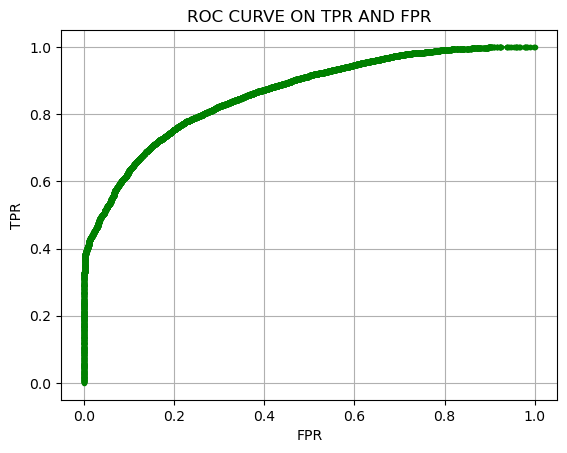

In [148]:
plt.plot(fpr, tpr , color='green' , marker='.')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC CURVE ON TPR AND FPR")
plt.grid()

### APPLY ON MULTIPLE ALGORITHMS

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [150]:
models=[]

models.append(('LogisticRegression',LogisticRegression()))
models.append(('Decision_tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Naive_bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))

In [151]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    cm = confusion_matrix(predictions, y_test)
    print("Confusion Matrix:")
    print(cm)
    
    acc = accuracy_score(predictions, y_test)
    print("Accuracy Score:", acc)
    
    report = classification_report(predictions, y_test)
    print("Classification Report:")
    print(report)
    
    print('\n')


LogisticRegression
Confusion Matrix:
[[17313  4614]
 [ 1405  6471]]
Accuracy Score: 0.798040465724927
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     21927
           1       0.58      0.82      0.68      7876

    accuracy                           0.80     29803
   macro avg       0.75      0.81      0.77     29803
weighted avg       0.83      0.80      0.81     29803



Decision_tree
Confusion Matrix:
[[16040  2625]
 [ 2678  8460]]
Accuracy Score: 0.8220648927960272
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     18665
           1       0.76      0.76      0.76     11138

    accuracy                           0.82     29803
   macro avg       0.81      0.81      0.81     29803
weighted avg       0.82      0.82      0.82     29803



KNN
Confusion Matrix:
[[16696  3374]
 [ 2022  7711]]
Accuracy Score: 0.8189444015703117
Classifi

#### RANDOM FOREST GIVES GOOD RESULT WITH 85 % ACCURACY 

In [152]:

evaluation_metrics = []

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    cm = confusion_matrix(predictions, y_test)
    acc = accuracy_score(predictions, y_test)
    report = classification_report(predictions, y_test, output_dict=True)
    
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    # Append metrics to the list
    evaluation_metrics.append([name, acc, precision, recall, f1_score])

# Create a DataFrame from the list of evaluation metrics
df = pd.DataFrame(evaluation_metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

df


,Model,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression,0.798040,0.834776,0.798040,0.807158
1,Decision_tree,0.823038,0.822905,0.823038,0.822970
2,KNN,0.818944,0.827852,0.818944,0.821668
3,Naive_bayes,0.583096,0.795113,0.583096,0.601442
4,Random Forest,0.856659,0.863462,0.856659,0.858570
